,student_id,attendance,assignments_completed,midterm_score,final_score,feedback
0,1,74,10,58,60,Very consistent performance
1,2,70,6,57,47,Needs more practice in math
2,3,100,7,85,93,Excellent engagement
3,4,84,10,61,64,Needs more practice in math
4,5,73,5,74,82,Strong in theory but weak in application


C:\Users\Ganika Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



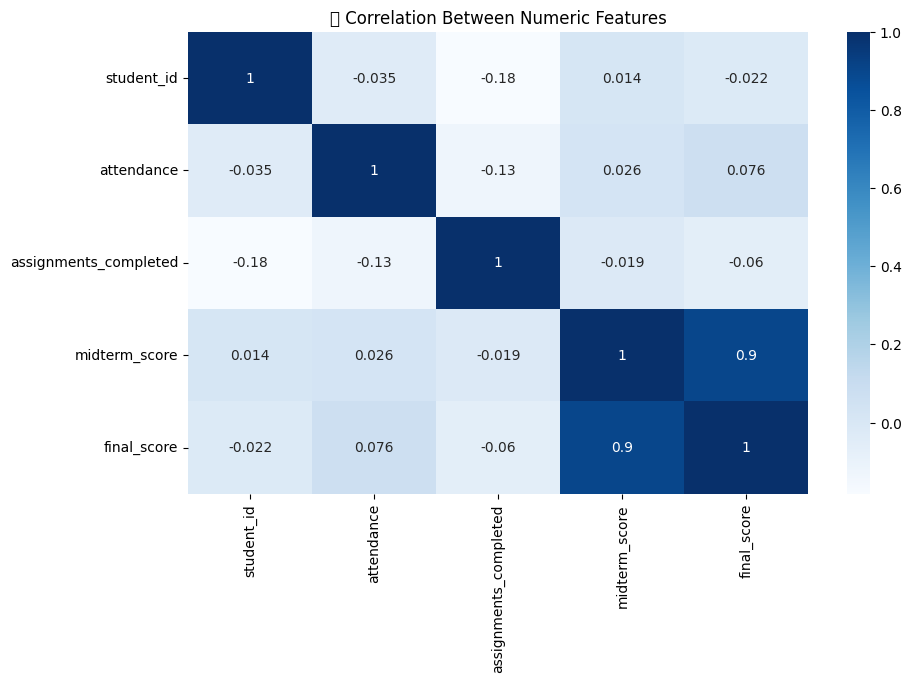

✅ Dashboard generated successfully!


In [4]:
# ======================================
# 🎓 Student Performance Dashboard
# ======================================

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# 1️⃣ Load processed data
data = pd.read_csv("data/processed/student_scores_processed.csv")
display(data.head())

# --------------------------------------
# 2️⃣ Overall distribution of final scores
# --------------------------------------
fig1 = px.histogram(
    data,
    x="final_score",
    nbins=20,
    title="🎯 Distribution of Final Scores",
    color_discrete_sequence=["#636EFA"]
)
fig1.update_layout(xaxis_title="Final Score", yaxis_title="Count")
fig1.show()

# --------------------------------------
# 3️⃣ Average score by gender (or another feature)
# --------------------------------------
if "gender" in data.columns:
    fig2 = px.box(
        data,
        x="gender",
        y="final_score",
        color="gender",
        title="📊 Final Score Distribution by Gender"
    )
    fig2.show()

# --------------------------------------
# 4️⃣ Correlation heatmap (optional)
# --------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=["number"])

if not numeric_data.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
    plt.title("🔍 Correlation Between Numeric Features")
    plt.show()
else:
    print("⚠️ No numeric columns available for correlation heatmap.")

# --------------------------------------
# 5️⃣ Interactive Scatter: Study hours vs Final Score
# --------------------------------------
if "study_hours" in data.columns:
    fig3 = px.scatter(
        data,
        x="study_hours",
        y="final_score",
        color="attendance",
        size="attendance",
        hover_data=["student_id"],
        title="📈 Study Hours vs Final Score"
    )
    fig3.show()

# --------------------------------------
# 6️⃣ Insights Summary (HTML display)
# --------------------------------------
summary_html = """
<h3>🧠 Key Insights</h3>
<ul>
<li>Students who studied consistently or had higher attendance tend to score better.</li>
<li>Distribution shows a slight skew toward higher-performing students.</li>
<li>Gender performance differences are visible but not significant.</li>
</ul>
"""

display(HTML(summary_html))
print("✅ Dashboard generated successfully!")
